In [4]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pybaseball import lahman
lahman.download_lahman()
import matplotlib.pyplot as plt 
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [5]:
team_batting = pd.read_csv("Teambatting.csv")
team_relief = pd.read_csv("Teamrelief.csv")
starting_pitchers = pd.read_csv("Startingpitchers.csv")
game_log_home = pd.read_csv("Gameloghome.csv")
game_log_away = pd.read_csv("Gamelogaway.csv")

In [6]:
homebattinglog = pd.merge(left=game_log_home, right=team_batting, left_on='Home', right_on='Team')
awaybattinglog = pd.merge(left=game_log_away, right=team_batting, left_on='Away', right_on='Team')

In [7]:
homelog = pd.merge(left=homebattinglog, right=team_relief, left_on='Away', right_on='Team')
awaylog = pd.merge(left=awaybattinglog, right=team_relief, left_on='Home', right_on='Team')

In [8]:
finallog1 = pd.merge(left=homelog, right=starting_pitchers, left_on='Away starter', right_on='Name')
finallog2 = pd.merge(left=awaylog, right=starting_pitchers, left_on='Home starter', right_on='Name')
finallog = pd.concat([finallog1, finallog2])
#finallog.to_csv('mlbdata1.csv')

In [17]:
mlbdata = pd.read_csv("mlbdata1.csv")
list(mlbdata.columns)

['Unnamed: 0',
 'Date',
 'Day',
 'Away',
 'Home',
 'Away Score',
 'Home Score',
 'Away p/27',
 'Home p/27',
 'Night game',
 'Away starter',
 'Home starter',
 'Home1',
 'Score',
 'G_x',
 'PA',
 'HR',
 'R',
 'RBI',
 'SB',
 'Bbpctbat',
 'Kpctbat',
 'ISO',
 'BABIPbat',
 'AVGbat',
 'OBP',
 'SLG',
 'wOBA',
 'wRCplus',
 'BsR',
 'Off',
 'Def',
 'WARbat',
 'Team_y',
 'W',
 'L',
 'SV',
 'G_y',
 'IP',
 'Kper9rel',
 'BBper9rel',
 'HRper9rel',
 'BABIPrel',
 'LOBpctrel',
 'GBpct',
 'HRperFB',
 'ERArel',
 'FIPrel',
 'xFIPrel',
 'WARrel',
 'Name',
 'Team',
 'Kper9st',
 'BBper9st',
 'KperBB',
 'HRper9st',
 'Kpctst',
 'BBpctst',
 'K-BB%',
 'AVGst',
 'WHIP',
 'BABIP',
 'LOBpctst',
 'ERA-',
 'FIP-',
 'xFIP-',
 'ERAst',
 'FIPst',
 'E-F',
 'xFIPst',
 'SIERA']

<IPython.core.display.Javascript object>


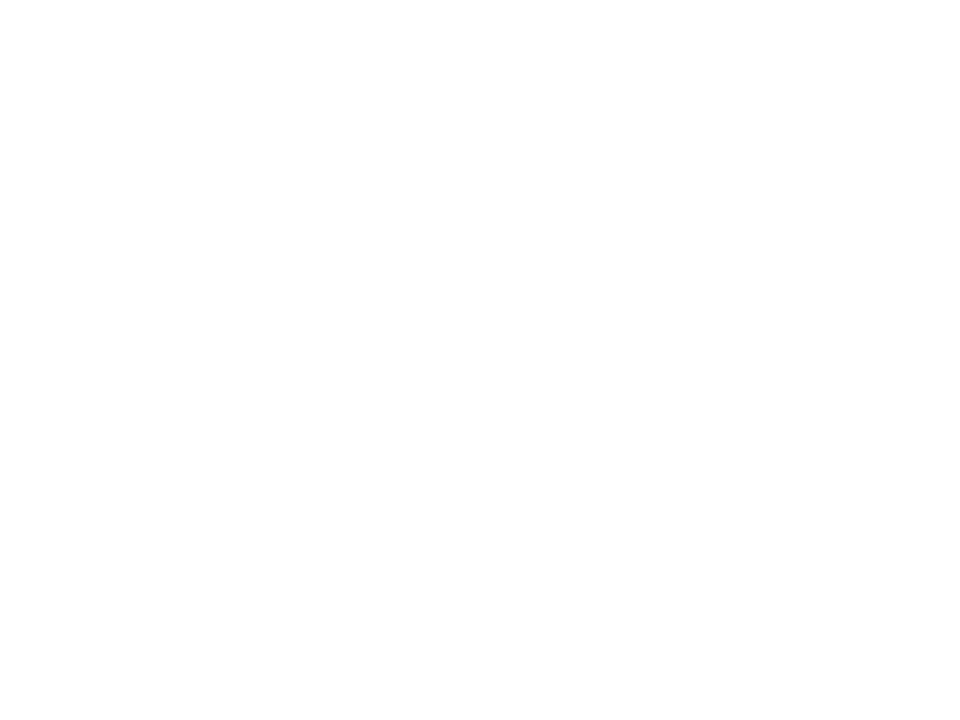

<IPython.core.display.Javascript object>


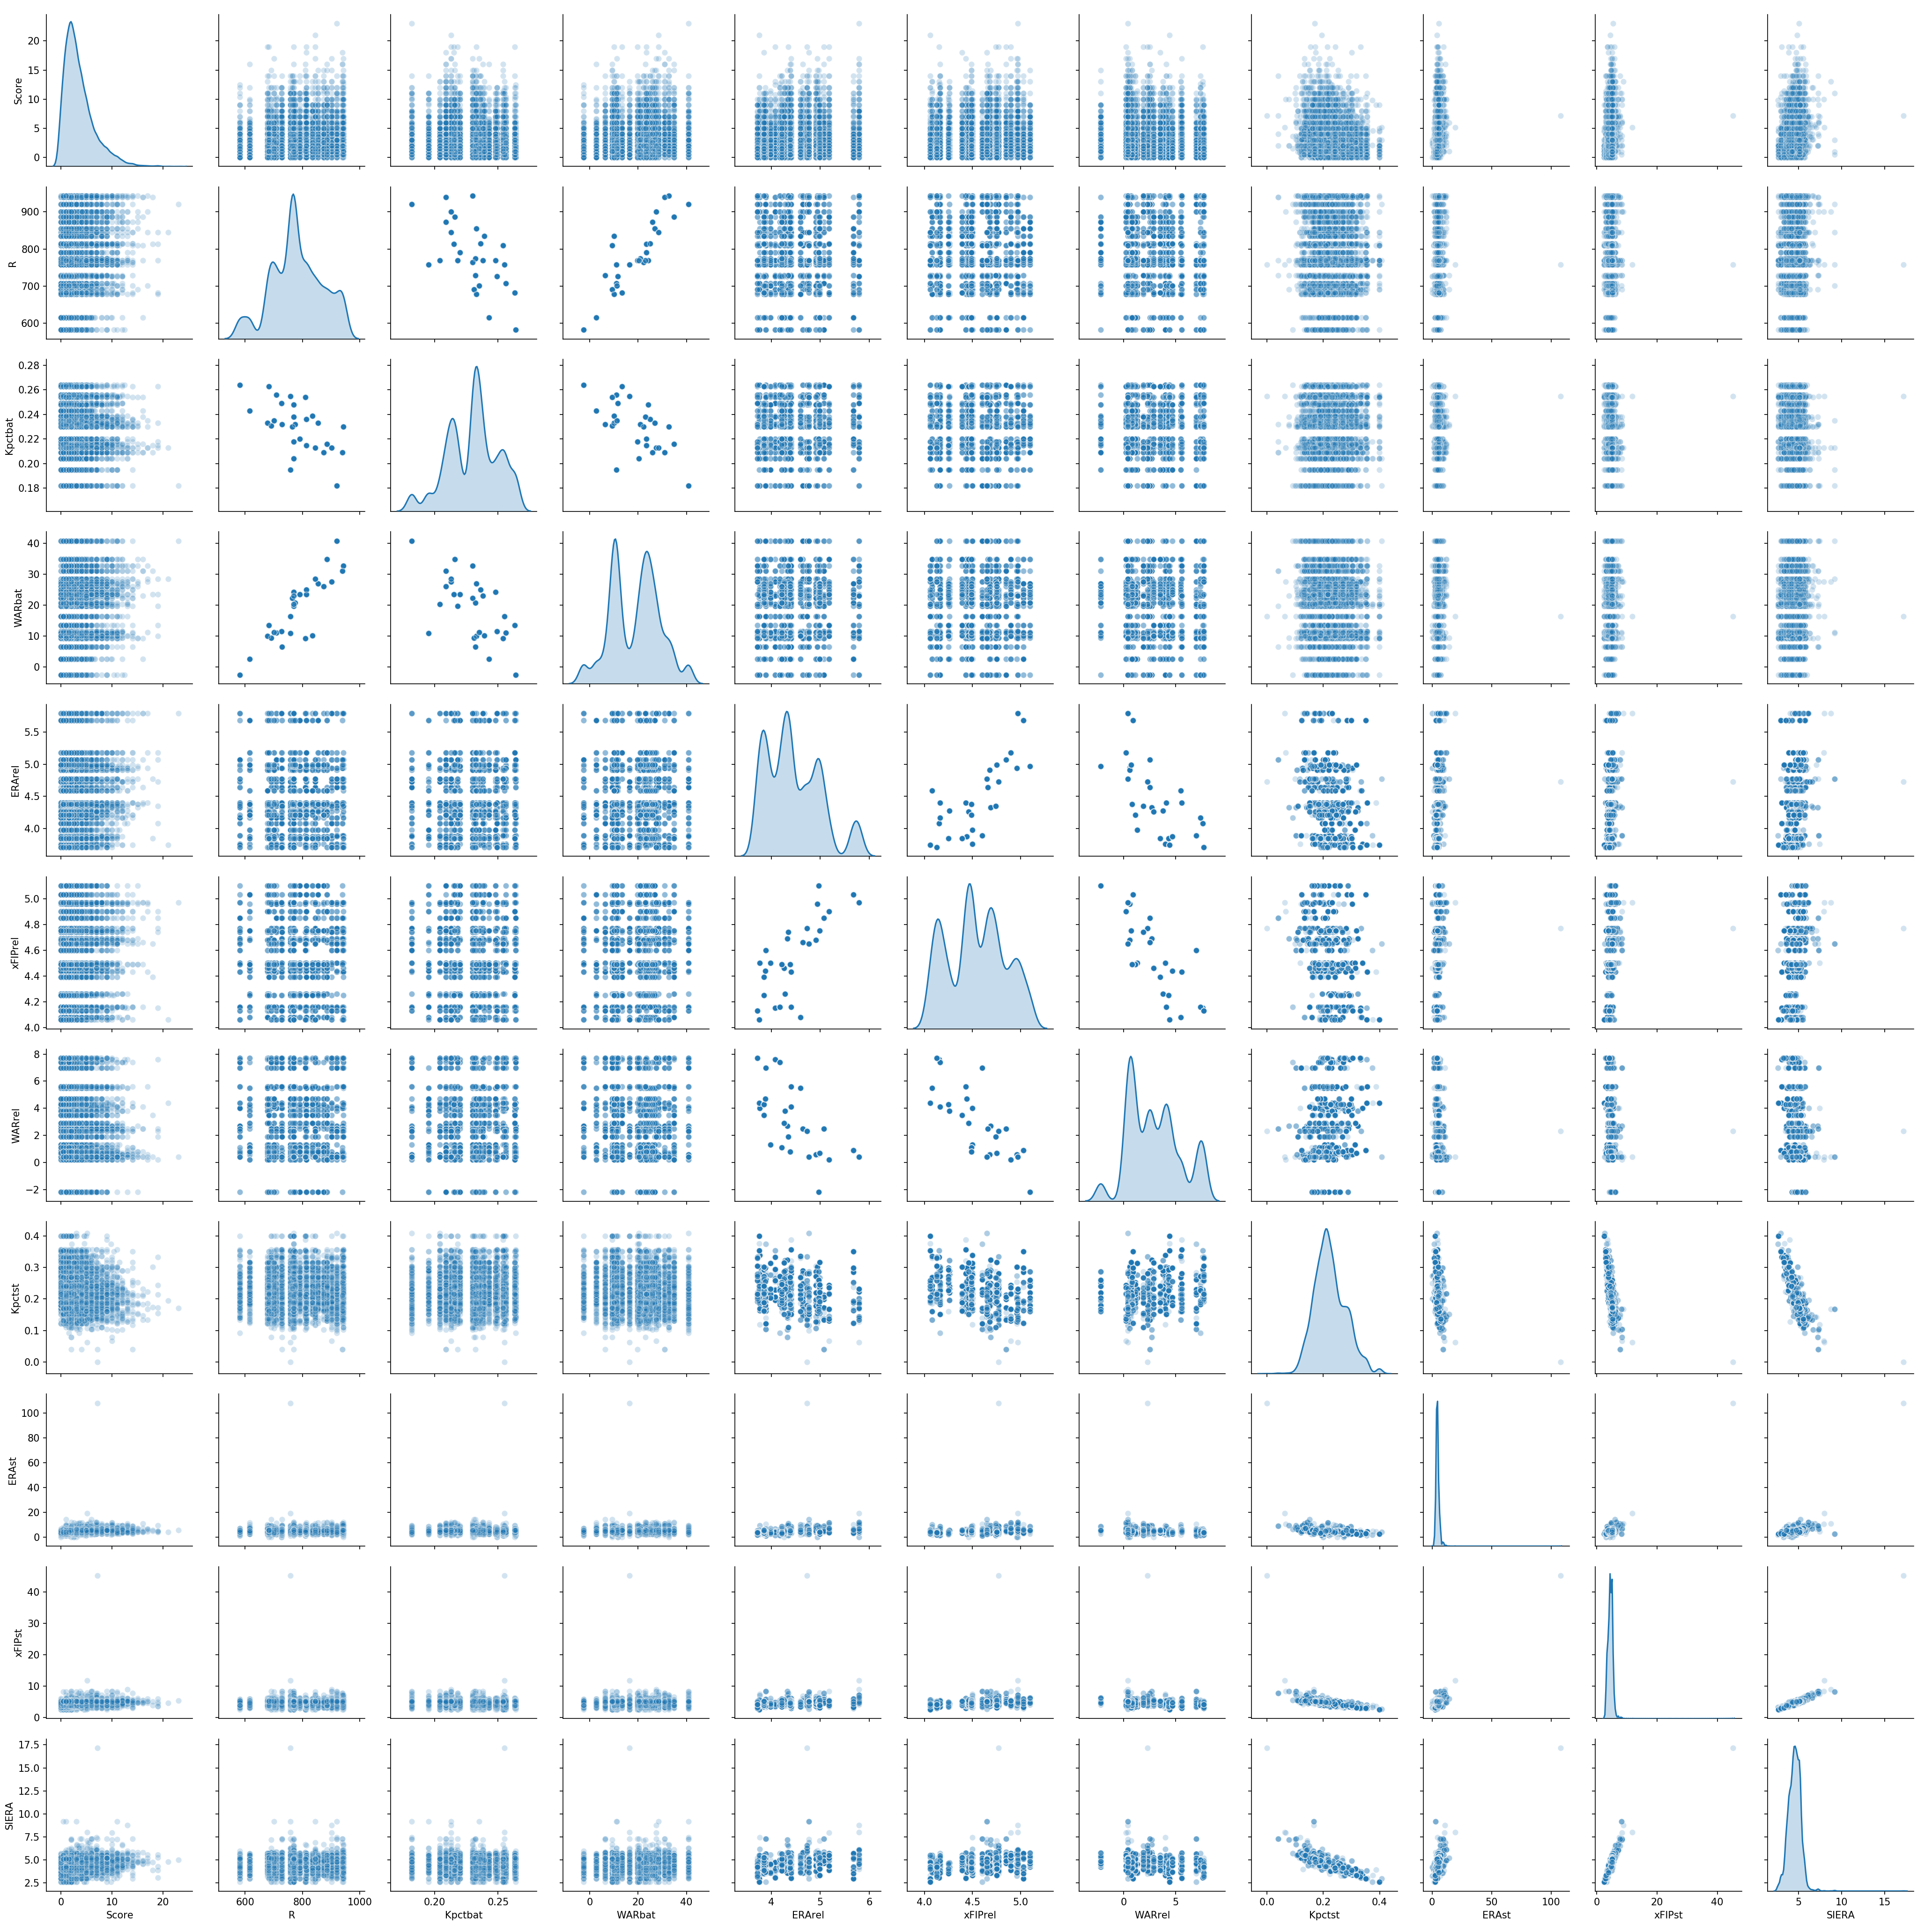

In [29]:
fig = plt.figure()
mlb_selected = mlbdata[['Score', 'R', 'Kpctbat', 'WARbat', 'ERArel', 'xFIPrel', 'WARrel', 'Kpctst', 'ERAst', 'xFIPst', 'SIERA']]
sns.pairplot(mlb_selected, diag_kind='kde', plot_kws={'alpha': 0.2})

In [18]:
score_prediction_formula = "Score ~ R + Home + Home1 + Bbpctbat + Kpctbat + BABIPbat + ISO + wRCplus + wOBA + WARbat + Kper9rel + BBper9rel + ERArel + xFIPrel + WARrel + BABIPrel + HRperFB + Kper9st + BBper9st + Kpctst + BBpctst + BABIP + LOBpctst +  ERAst + xFIPst + SIERA"
score_prediction_ols_model = smf.ols(formula = score_prediction_formula, data = mlbdata).fit()
score_prediction_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     12.44
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.45e-99
Time:                        18:04:48   Log-Likelihood:                -11801.
No. Observations:                4858   AIC:                         2.371e+04
Df Residuals:                    4803   BIC:                         2.407e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5863      5.855      1.637      0.102      -1.893      21.065
Home[T.ARI]    -0.4699      0.354     -1.326      0.185      -1.165       0.225
Home[T.ATL]    -0.3198      0.345     -0.927      0.354      -0.996       0.357
Home[T.BAL]     0.9703      0.324      2.990      0.003       0.334       1.607
Home[T.BOS]    -0.0048      0.333     -0.015      0.988      -0.659       0.649
Home[T.CHA]     0.0128      0.350      0.037      0.971      -0.674       0.700
Home[T.CHN]    -0.6397      0.344     -1.861      0.063      -1.313       0.034
Home[T.CIN]     0.0117      0.348      0.034      0.973      -0.671       0.695
Home[T.CLE]    -0.3859      0.330     -1.169      0.243      -1.033       0.261
Home[T.COL]     1.1020      0.354      3.112      0.002       0.408       1.796
Home[T.DET]     1.1119      0.339      3.279      0.001       0.447       1.777
Home[T.HOU]    -0.6362      0.325     -1.955      0.051      -1.274       0.002
Home[T.KCA]     0.4547      0.342      1.331      0.183      -0.215       1.124
Home[T.LAN]    -1.0577      0.346     -3.060      0.002      -1.735      -0.380
Home[T.MIA]     0.3362      0.347      0.969      0.332      -0.344       1.016
Home[T.MIL]    -0.3913      0.348     -1.123      0.261      -1.074       0.292
Home[T.MIN]    -0.5123      0.346     -1.479      0.139      -1.192       0.167
Home[T.NYA]    -1.1431      0.340     -3.364      0.001      -1.809      -0.477
Home[T.NYN]    -0.4079      0.342     -1.192      0.233      -1.079       0.263
Home[T.OAK]    -0.9905      0.327     -3.030      0.002      -1.631      -0.350
Home[T.PHI]    -0.1717      0.348     -0.494      0.621      -0.853       0.510
Home[T.PIT]     0.3395      0.337      1.009      0.313      -0.320       0.999
Home[T.SDN]    -0.3968      0.353     -1.124      0.261      -1.089       0.295
Home[T.SEA]     0.1900      0.323      0.589      0.556      -0.443       0.823
Home[T.SFN]    -0.4573      0.348     -1.316      0.188      -1.139       0.224
Home[T.SLN]    -0.7868      0.347     -2.270      0.023      -1.466      -0.107
Home[T.TBA]    -0.8226      0.327     -2.513      0.012      -1.464      -0.181
Home[T.TEX]     0.5647      0.323      1.748      0.081      -0.069       1.198
Home[T.TOR]     0.1377      0.324      0.425      0.671      -0.498       0.773
Home[T.WAS]    -0.0375      0.341     -0.110      0.912      -0.706       0.631
R               0.0066      0.002      3.017      0.003       0.002       0.011
Home1          -0.8555      0.079    -10.787      0.000      -1.011      -0.700
Bbpctbat      -23.8432     15.001     -1.589      0.112     -53.252       5.566
Kpctbat         9.9140      7.996      1.240      0.215      -5.761      25.589
BABIPbat      -17.5132     17.364     -1.009      0.313     -51.555      16.529
ISO           -11.2266     17.611     -0.63

In [19]:
residuals = score_prediction_ols_model.resid
fitted = score_prediction_ols_model.fittedvalues
coefs = score_prediction_ols_model.params
coefs

Intercept       9.586273
Home[T.ARI]    -0.469880
Home[T.ATL]    -0.319788
Home[T.BAL]     0.970349
Home[T.BOS]    -0.004838
Home[T.CHA]     0.012794
Home[T.CHN]    -0.639693
Home[T.CIN]     0.011697
Home[T.CLE]    -0.385890
Home[T.COL]     1.102017
Home[T.DET]     1.111936
Home[T.HOU]    -0.636208
Home[T.KCA]     0.454657
Home[T.LAN]    -1.057707
Home[T.MIA]     0.336234
Home[T.MIL]    -0.391308
Home[T.MIN]    -0.512329
Home[T.NYA]    -1.143116
Home[T.NYN]    -0.407886
Home[T.OAK]    -0.990467
Home[T.PHI]    -0.171735
Home[T.PIT]     0.339536
Home[T.SDN]    -0.396763
Home[T.SEA]     0.190003
Home[T.SFN]    -0.457315
Home[T.SLN]    -0.786810
Home[T.TBA]    -0.822619
Home[T.TEX]     0.564713
Home[T.TOR]     0.137657
Home[T.WAS]    -0.037463
R               0.006579
Home1          -0.855492
Bbpctbat      -23.843217
Kpctbat         9.913976
BABIPbat      -17.513153
ISO           -11.226567
wRCplus        -0.017044
wOBA            2.177378
WARbat          0.066685
Kper9rel        0.042099


<IPython.core.display.Javascript object>


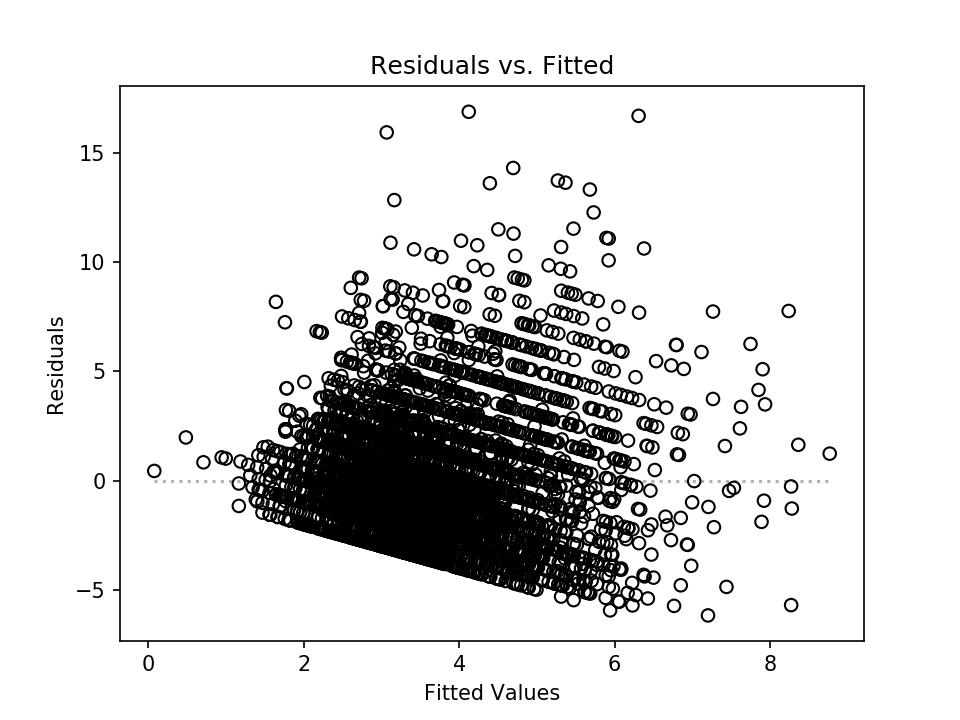

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

In [20]:
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)], [0,0], color = 'k', linestyle = ':', alpha =.3)

plt.show()

<IPython.core.display.Javascript object>


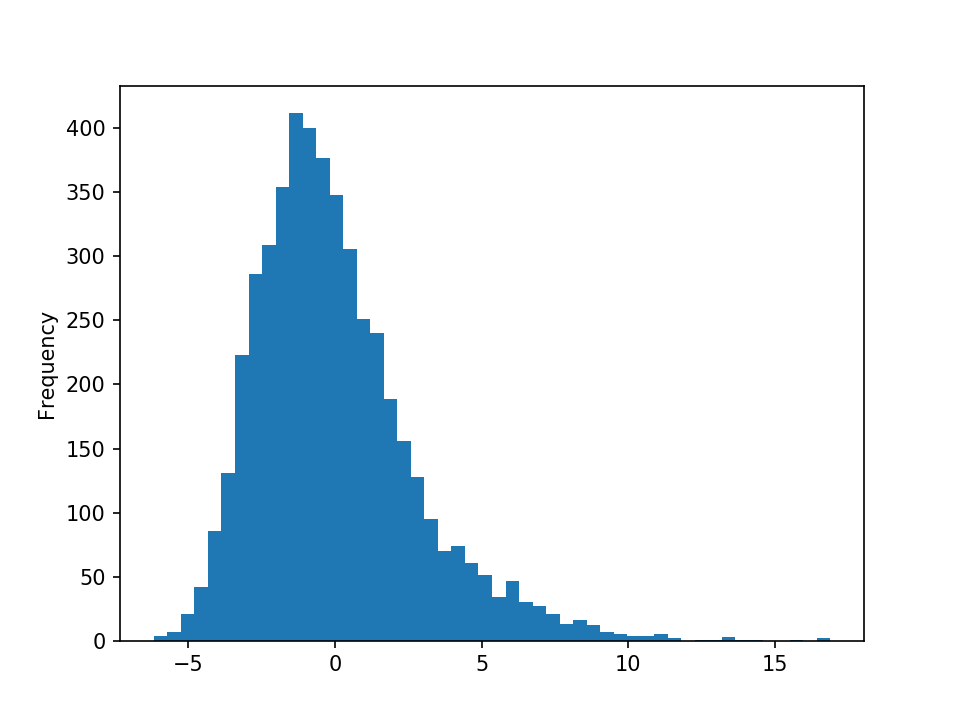

In [22]:
fig = plt.figure()
ax1 = residuals.plot.hist(bins=50)

<IPython.core.display.Javascript object>


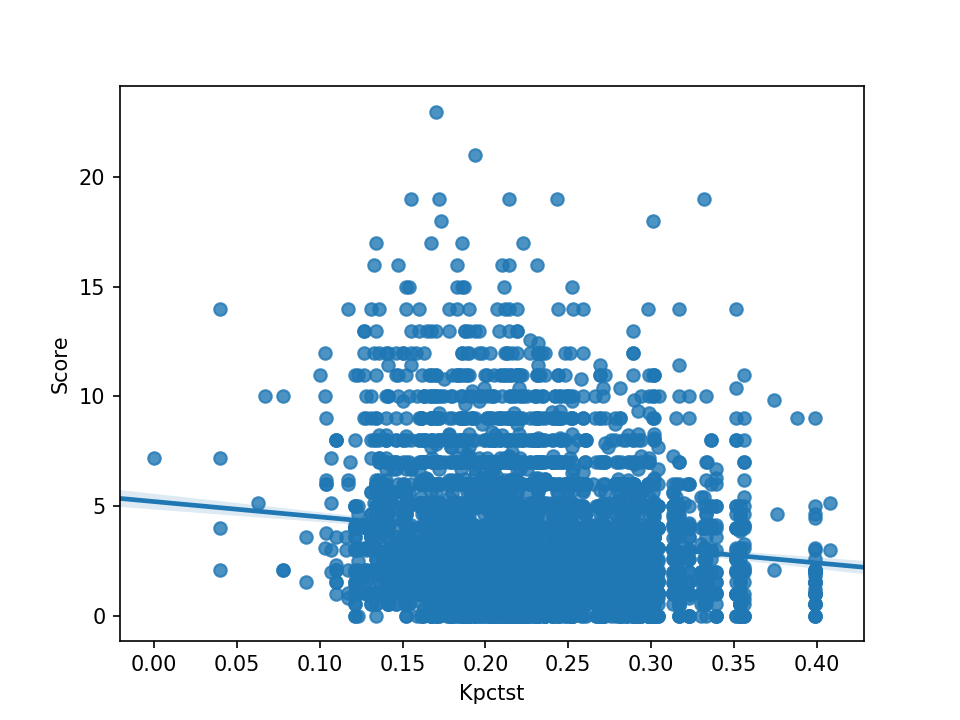

In [28]:
fig = plt.figure()
sns.regplot('Kpctst','Score', data = mlbdata)